In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

<h2> Binary Classification </h2>

In [2]:
df = pd.read_csv("original.csv")

In [3]:
df.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [4]:
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,1.000000


<h3>pre-processing data</h3>

In [5]:
import seaborn as sns

1. missing values in n_hos_beds <br>
==> fill them with mean 

In [6]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

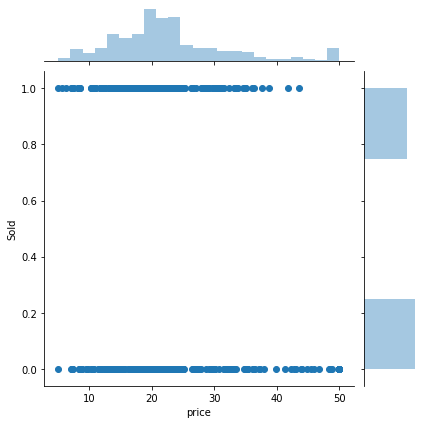

In [7]:
sns.jointplot(x="price",y="Sold",data=df)

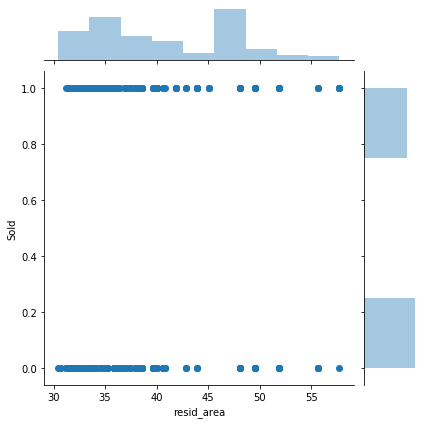

In [8]:
sns.jointplot(x="resid_area",y="Sold",data=df)

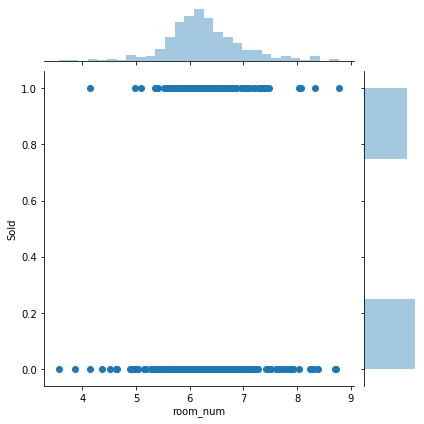

In [9]:
sns.jointplot(x="room_num",y="Sold",data=df)

2. we can merge dist1,dist2,dist3,dist4 into single column since each cannot effect outcome individually <br>
==> take avg of all those columns

In [10]:
df["avg_dist"]=(df.dist1+df.dist2+df.dist3+df.dist4)/4

In [11]:
del df["dist1"]
del df["dist2"]
del df["dist3"]
del df["dist4"]

In [12]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold,avg_dist
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0,4.0875
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1,4.9675
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0,4.9675
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0,6.0650
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0,6.0625


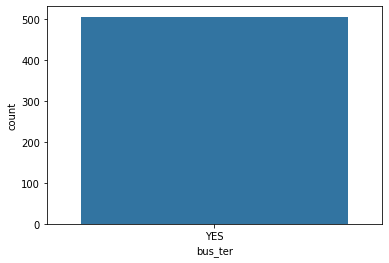

In [13]:
sns.countplot(x="bus_ter",data=df)

3. bus_ter has only single value i.e. it is a constant <br>
==> delete this column

In [14]:
del df["bus_ter"]

4. airport and waterbody have non-numerical values <br>
==> change them to categorical values

In [15]:
df = pd.get_dummies(df)

In [16]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,0,4.0875,0,1,0,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,1,4.9675,1,0,1,0,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,101.1200,38,0.045764,0,4.9675,1,0,0,0,1,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,0,6.0650,0,1,1,0,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,0,6.0625,1,0,1,0,0,0


5. airport_NO and waterbody_None are redudant since 0's in airport_YES speak about airport_NO and all zeros in waterbody_Lake,waterbody_Lake and River,waterbody_River speak about waterbody_None column <br>
==> delete those columns

In [17]:
del df["airport_NO"]
del df["waterbody_None"]

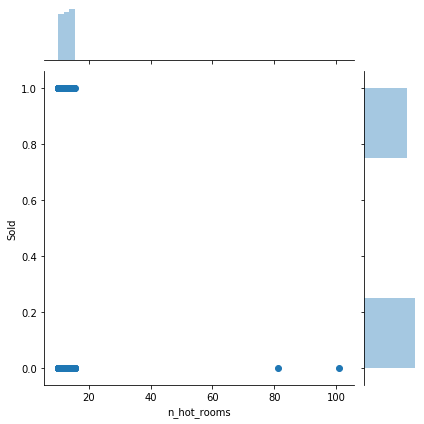

In [18]:
sns.jointplot(x="n_hot_rooms",y="Sold",data=df)

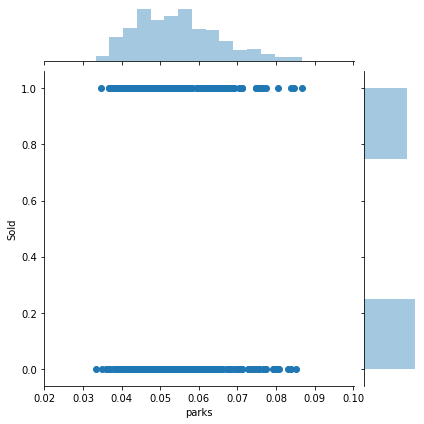

In [19]:
sns.jointplot(x="parks",y="Sold",data=df)

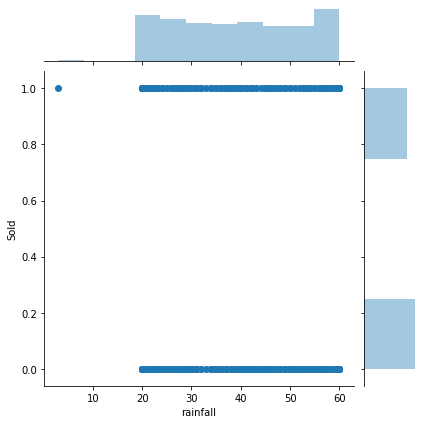

In [20]:
sns.jointplot(x="rainfall",y="Sold",data=df)

6. From above plots we can infer that there are outliers in "n_hot_rooms" and "rainfall" columns <br>
==> remove outliers through 'Capping and Flooring' method <br>
i.e., 1st and 99th percentile implies values that are less than the value at 1st percentile are replaced by the value at 1st percentile, and values that are greater than the value at 99th percentile are replaced by the value at 99th percentile. 


In [21]:
tmp = np.percentile(df.n_hot_rooms,99)
tmp

15.399519999999999

In [22]:
df["n_hot_rooms"]

0       11.1920
1       12.1728
2      101.1200
3       11.2672
4       11.2896
         ...   
501     12.1792
502     13.1648
503     12.1912
504     15.1760
505     10.1520
Name: n_hot_rooms, Length: 506, dtype: float64

In [23]:
df[(df.n_hot_rooms>tmp)]["n_hot_rooms"]

2      101.12
166     15.40
204     15.40
267     15.40
369     15.40
423     81.12
Name: n_hot_rooms, dtype: float64

In [24]:
df.n_hot_rooms[(df.n_hot_rooms)>3*tmp]=3*tmp

/home/vamsi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df[(df.n_hot_rooms>tmp)]["n_hot_rooms"]

2      46.19856
166    15.40000
204    15.40000
267    15.40000
369    15.40000
423    46.19856
Name: n_hot_rooms, dtype: float64

In [26]:
#less than 1 percentile (look at the plot)
tmp2 = np.percentile(df.rainfall,[1])[0]
tmp2

20.0

In [27]:
df[(df.rainfall<tmp2)]["rainfall"]

213    3
Name: rainfall, dtype: int64

In [28]:
df.rainfall[(df.rainfall<0.3*tmp2)] = 0.3*tmp2

/home/vamsi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df[(df.rainfall<tmp2)]["rainfall"]

213    6
Name: rainfall, dtype: int64

In [30]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,0,4.0875,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,4.9675,0,1,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,4.9675,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,6.0650,1,1,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,6.0625,0,1,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     506 non-null    float64
 1   resid_area                506 non-null    float64
 2   air_qual                  506 non-null    float64
 3   room_num                  506 non-null    float64
 4   age                       506 non-null    float64
 5   teachers                  506 non-null    float64
 6   poor_prop                 506 non-null    float64
 7   n_hos_beds                506 non-null    float64
 8   n_hot_rooms               506 non-null    float64
 9   rainfall                  506 non-null    int64  
 10  parks                     506 non-null    float64
 11  Sold                      506 non-null    int64  
 12  avg_dist                  506 non-null    float64
 13  airport_YES               506 non-null    uint8  
 14  waterbody_

In [32]:
df.corr()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.017007,-0.047200,-0.391574,-0.154698,0.249289,0.182867,0.036233,-0.037497,0.071751
resid_area,-0.484754,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.003761,0.055845,0.707635,0.024404,-0.708022,-0.115401,-0.026590,0.051649,-0.098976
air_qual,-0.429300,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,0.007238,0.091956,0.915544,-0.004017,-0.769247,-0.073903,-0.046393,0.013849,-0.037772
room_num,0.696304,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.014583,-0.064718,-0.282817,0.027148,0.205241,0.163774,-0.004195,0.010554,0.046251
age,-0.377999,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.013918,0.074684,0.673850,-0.016291,-0.747906,0.005101,0.003452,-0.004354,-0.088609
teachers,0.505655,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.037007,-0.045928,-0.187004,0.042525,0.232452,0.069437,0.048717,-0.046981,0.094256
poor_prop,-0.740836,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.017036,0.061444,0.552310,-0.082776,-0.496967,-0.095054,0.003197,0.020620,-0.109004
n_hos_beds,0.108880,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.003130,0.058596,-0.071272,0.066847,-0.027871,-0.006365,0.042278,0.059482,-0.074148
n_hot_rooms,0.017007,-0.003761,0.007238,0.014583,0.013918,-0.037007,0.017036,-0.003130,1.000000,0.014869,0.023757,-0.090338,-0.020700,-0.055338,0.037925,0.014755,-0.064096
rainfall,-0.047200,0.055845,0.091956,-0.064718,0.074684,-0.045928,0.061444,0.058596,0.014869,1.000000,0.078278,-0.040114,-0.037285,-0.013171,-0.016170,0.109234,-0.037016


In [33]:
x_ = df.drop("Sold",axis=1)

In [34]:
y_ = df["Sold"]

In [35]:
x_.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,0,1,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,1,1,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,0,1,0,0


In [36]:
y_.head()

0    0
1    1
2    0
3    0
4    0
Name: Sold, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x_,y_,test_size=0.2)

<h3> SVM classifier </h3>

In [39]:
from sklearn.svm import SVC

In [40]:
clf = SVC(gamma='auto')
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
clf.score(x_test,y_test)

0.5196078431372549

<h3> ANN approach </h3>

In [42]:
import tensorflow as tf
from tensorflow import keras

In [43]:
np.random.seed(40)
tf.random.set_seed(40)

In [44]:
X_train,x_valid,Y_train,y_valid = train_test_split(x_train,y_train,test_size=0.1)

In [45]:
print(X_train.shape)
print(x_valid.shape)
print(Y_train.shape)
print(y_valid.shape)

(363, 16)
(41, 16)
(363,)
(41,)


In [46]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(256,activation="relu",input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(32,activation="relu"))
model.add(keras.layers.Dense(32,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               4352      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss="binary_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [49]:
model_history = model.fit(X_train,Y_train,epochs=30,validation_data=(x_valid,y_valid))

Train on 363 samples, validate on 41 samples
Epoch 1/30
363/363 [==============================] - 1s 2ms/sample - loss: 1.1484 - accuracy: 0.5289 - val_loss: 0.7247 - val_accuracy: 0.5122
Epoch 2/30
363/363 [==============================] - 0s 331us/sample - loss: 0.6891 - accuracy: 0.5565 - val_loss: 0.7042 - val_accuracy: 0.5366
Epoch 3/30
363/363 [==============================] - 0s 200us/sample - loss: 0.6978 - accuracy: 0.5372 - val_loss: 0.6749 - val_accuracy: 0.5366
Epoch 4/30
363/363 [==============================] - 0s 360us/sample - loss: 0.6814 - accuracy: 0.5565 - val_loss: 0.6711 - val_accuracy: 0.5854
Epoch 5/30
363/363 [==============================] - 0s 314us/sample - loss: 0.6843 - accuracy: 0.5592 - val_loss: 0.7051 - val_accuracy: 0.5122
Epoch 6/30
363/363 [==============================] - 0s 272us/sample - loss: 0.6910 - accuracy: 0.5317 - val_loss: 0.6773 - val_accuracy: 0.5366
Epoch 7/30
363/363 [==============================] - 0s 275us/sample - loss: 0.6

In [50]:
model.evaluate(x_test,y_test)

102/102 [==============================] - 0s 320us/sample - loss: 0.6583 - accuracy: 0.5882


[0.6583054205950569, 0.5882353]

In [51]:
model.save("Assignment_Model.h5")

In [52]:
del model
keras.backend.clear_session()